### Decision tree learning

In [1]:
!pip install graphviz

In [2]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 6.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

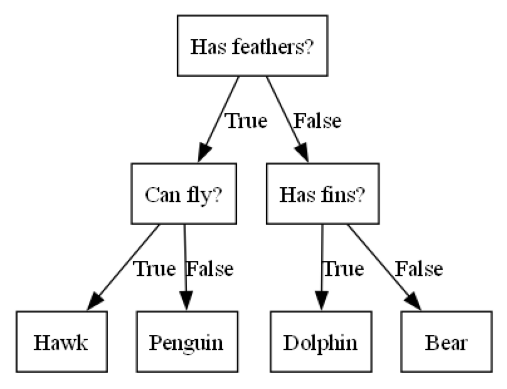

In [3]:
mglearn.plots.plot_animal_tree()

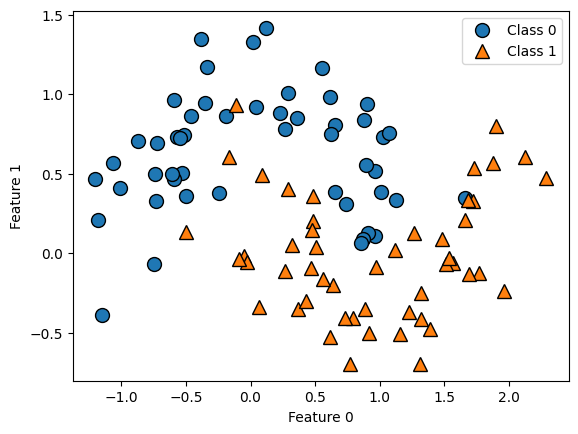

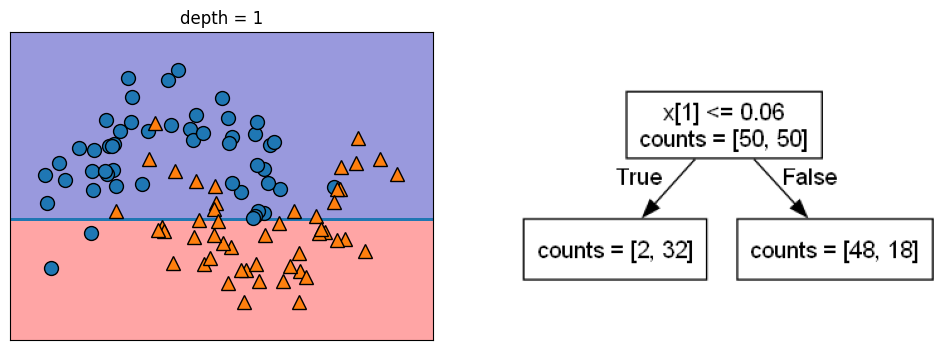

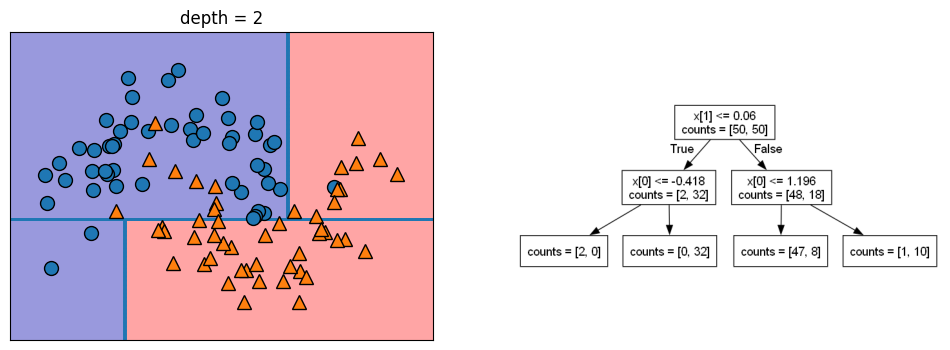

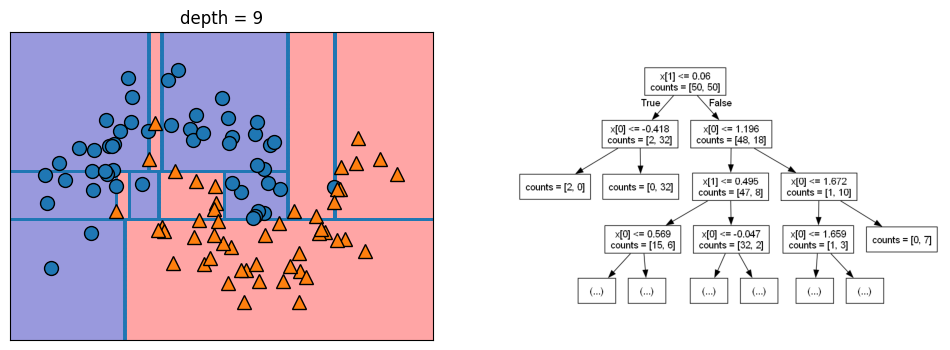

In [4]:
mglearn.plots.plot_tree_progressive()

### Controlling complexity of decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy for train set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy for test set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy for train set: 1.000
accuracy for test set: 0.937


In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy for train set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy for test set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy for train set: 0.988
accuracy for test set: 0.951


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malognant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

### Analyzing decision tree

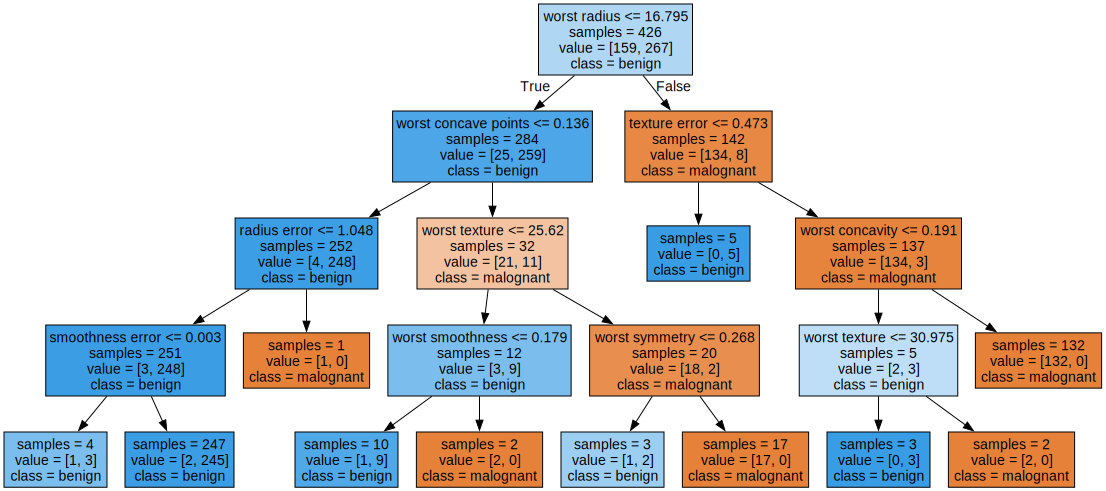

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


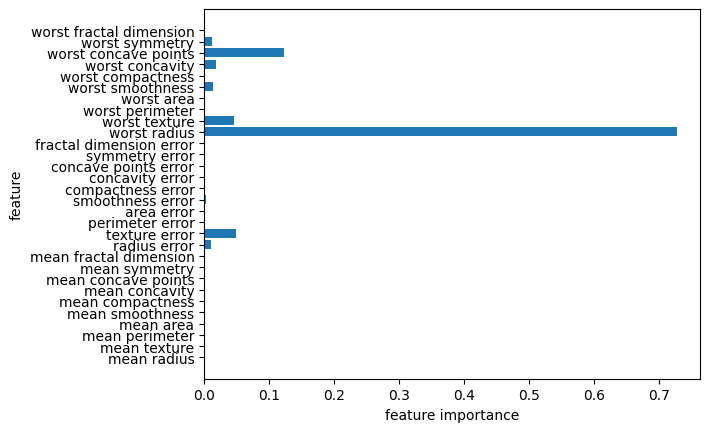

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


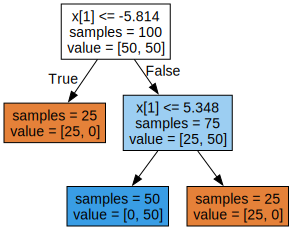

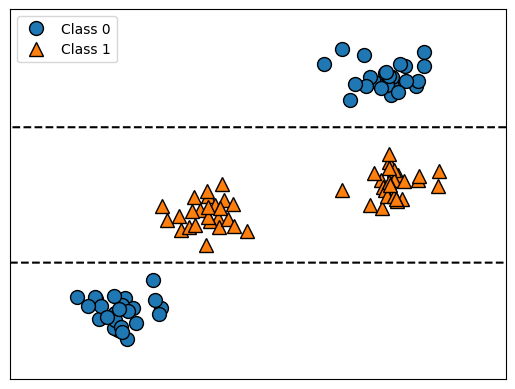

In [11]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [12]:
import pandas as pd
import os

Text(0, 0.5, 'price in $/MB')

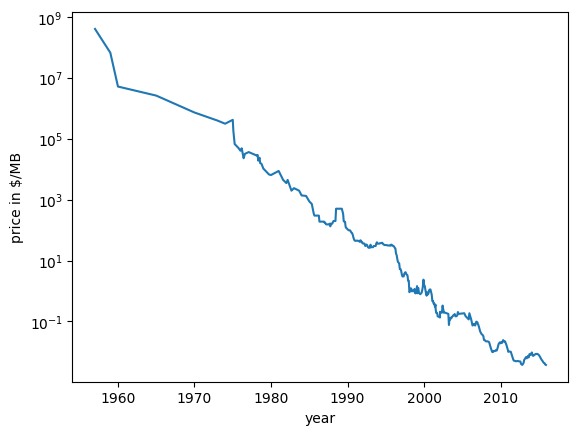

In [13]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price in $/MB")

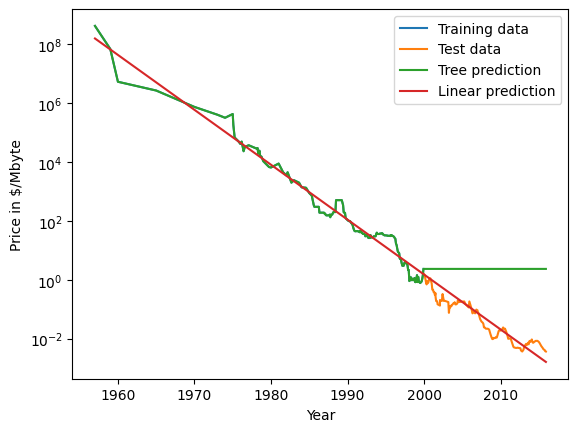

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.values.reshape(-1, 1)
y_train = np.log(data_train.price.values)

X_all = ram_prices.date.values.reshape(-1, 1)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy().reshape(-1, 1)

pred_tree = np.exp(tree.predict(X_all))      # inverse log
pred_linear = np.exp(linear.predict(X_all))  # inverse log

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, pred_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, pred_linear, label="Linear prediction")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

### Analyzing random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


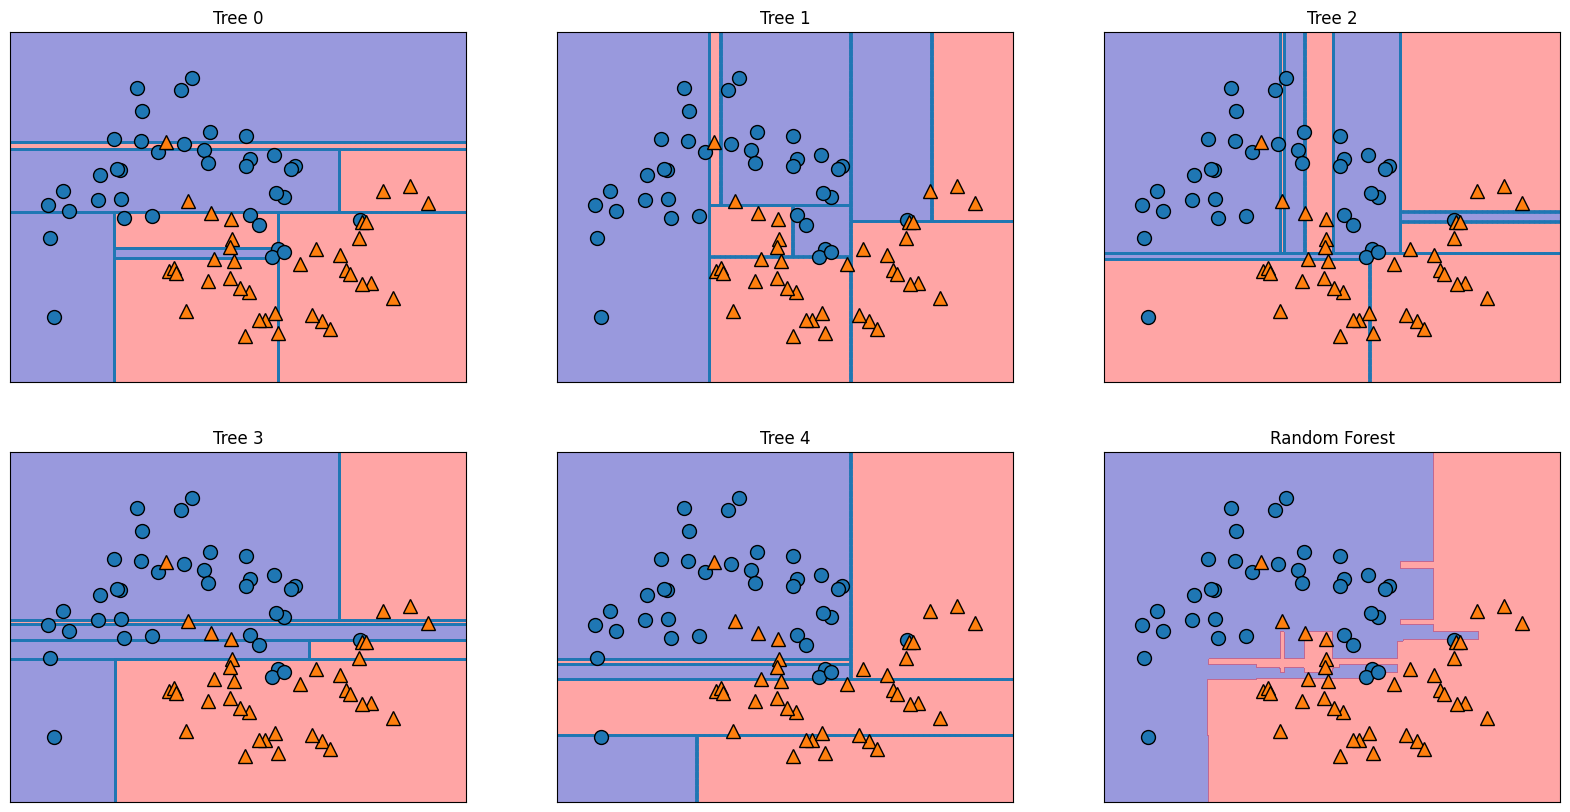

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("accuracy on train set: {:.3f}".format(forest.score(X_train, y_train)))
print("accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

accuracy on train set: 1.000
accuracy on test set: 0.972


### Entropy

In [24]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [27]:
from collections import Counter
import math

def calculate_entropy(data):
    total_elements = len(data)
    class_counts = Counter(data)
    entropy = 0.0

    for count in class_counts.values():
        probability = count / total_elements
        entropy -= probability * math.log2(probability)
    return entropy

target_entropy = calculate_entropy(df['target'])
print(f'Entropy dari target (kelas): {target_entropy}')

Entropy dari target (kelas): 1.584962500721156


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Akurasi model Decision Tree: {accuracy}')

Akurasi model Decision Tree: 0.9777777777777777


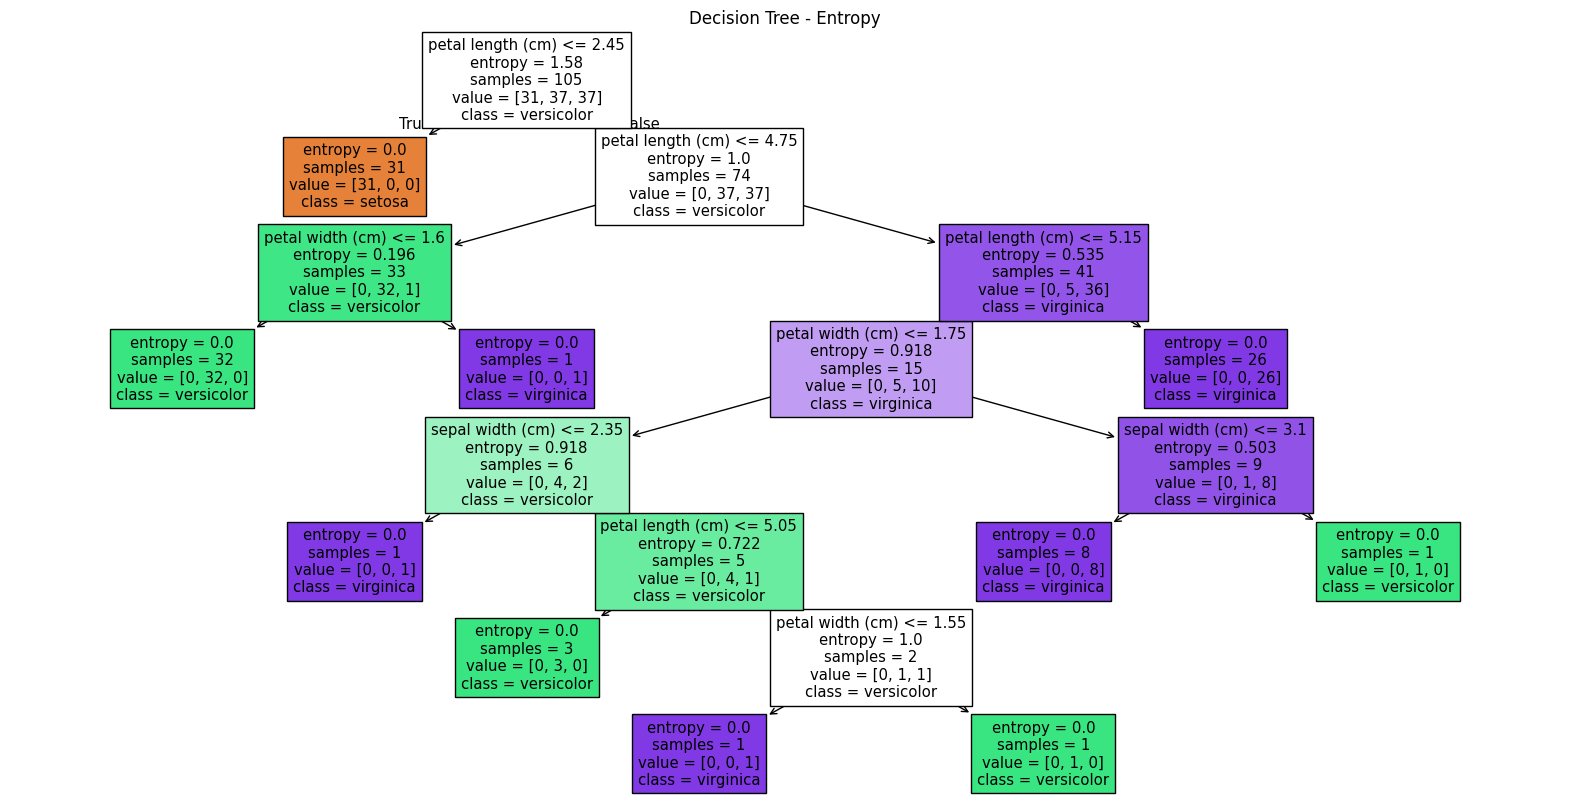

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree - Entropy')
plt.show()

### Classification with ID3

Accuracy of ID3 Decision Tree: 0.9777777777777777


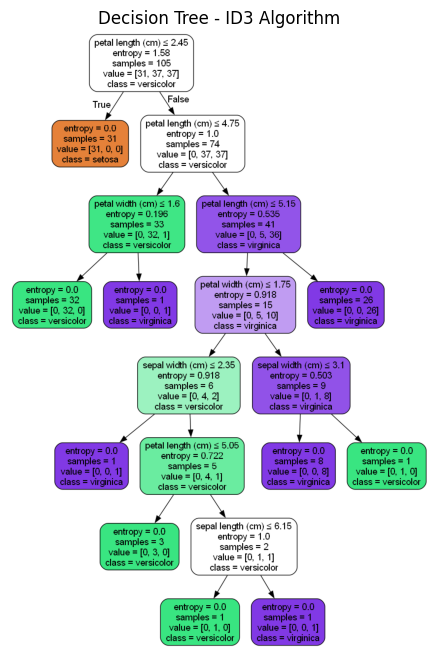

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Load and prepare data
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train ID3 (Entropy) Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ID3 Decision Tree: {accuracy}')

# Visualize the Decision Tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Save and display image
graph = graphviz.Source(dot_data)
graph.render("iris_id3_decision_tree", format='png') # Save tree as PNG

tree_image = plt.imread("iris_id3_decision_tree.png")
plt.figure(figsize=(10, 8))
plt.imshow(tree_image)
plt.axis('off')
plt.title('Decision Tree - ID3 Algorithm')
plt.show()

### Classification with C4.5

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [61]:
# Load and prepare data
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train C4.5 Decision Tree model (using entropy for Scikit-learn)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of C4.5 Decision Tree: {accuracy}')

Accuracy of C4.5 Decision Tree: 0.9777777777777777


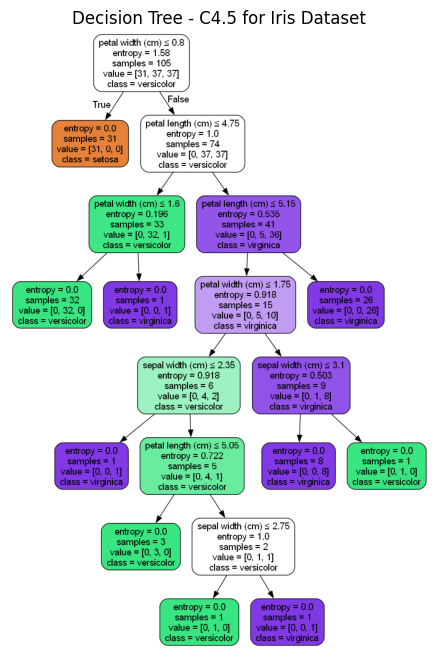

In [62]:
# Plot Decision Tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Save and display image
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png') # Save tree as PNG

# Display tree
graph_image = plt.imread("iris_decision_tree.png")
plt.figure(figsize=(8, 8))
plt.imshow(graph_image)
plt.axis('off')
plt.title('Decision Tree - C4.5 for Iris Dataset')
plt.show()